In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import shutil
import os
import time
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np 
import seaborn as sns
from shapely.geometry import Point
import simulation_lib as smlb
import subprocess


C:\Users\xuebi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### main paths

In [149]:
path_to_workflow = "D:\\\\moteur_calcul_pi4\\\\worflow.osw"
path_to_weather = "D:\\\\moteur_calcul_pi4_database\\\\CWEC_2020_QC"
base_path = "D:\\\\moteur_calcul_pi4"
software_path = "D:\\\\openstudio-3.7.0\\\\bin\\\\openstudio.exe"
weather_station_files = "D:\\PI4_main\\CWEEDS_2020_stns_all_REV_20210324.csv"

In [145]:
"""
identification_dataframe = pd.DataFrame(columns = ["arch_id","GEOMETRY_BASE_TYPE","sec_code" ,"NCEB_DEFAULT_TAG","Type"])
identification_dataframe.loc[0] = ["com_std_p1980", "RetailStandalone",[41,44,45], "BTAPPRE1980", "sim"]
identification_dataframe.loc[1] = ["com_std_1980_2010", "RetailStandalone",[41,44,45], "BTAP1980TO2010", "sim"]
identification_dataframe.loc[2] = ["com_std_2010_2020", "RetailStandalone",[41,44,45], "BTAP1980TO2010","sim"]
identification_dataframe.to_pickle('arch_data_main.pkl')
"""


'\nidentification_dataframe = pd.DataFrame(columns = ["arch_id","GEOMETRY_BASE_TYPE","sec_code" ,"NCEB_DEFAULT_TAG","Type"])\nidentification_dataframe.loc[0] = ["com_std_p1980", "RetailStandalone",[41,44,45], "BTAPPRE1980", "sim"]\nidentification_dataframe.loc[1] = ["com_std_1980_2010", "RetailStandalone",[41,44,45], "BTAP1980TO2010", "sim"]\nidentification_dataframe.loc[2] = ["com_std_2010_2020", "RetailStandalone",[41,44,45], "BTAP1980TO2010","sim"]\nidentification_dataframe.to_pickle(\'arch_data_main.pkl\')\n'

## main dataframe handling

In [137]:
ach_ids_data = pd.read_pickle('arch_data_main.pkl')

In [138]:
ach_ids_data

,arch_id,GEOMETRY_BASE_TYPE,sec_code,NCEB_DEFAULT_TAG,Type
0,com_std_p1980,RetailStandalone,"[41, 44, 45]",BTAPPRE1980,sim
1,com_std_1980_2010,RetailStandalone,"[41, 44, 45]",BTAP1980TO2010,sim
2,com_std_2010_2020,RetailStandalone,"[41, 44, 45]",BTAP1980TO2010,sim


In [161]:
quebec_base_database

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,Zone,weather_zo,geometry,com_std_p1980,com_std_1980_2010,com_std_2010_2020
0,2447,La Haute-Yamaska,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-72.60701 45.53762, -72.60611 45.526...",167.481953,249.656051,74.861996
1,2448,Acton,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-72.58505 45.78258, -72.5769 45.7778...",0.000000,0.000000,0.000000
2,2449,Drummond,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-72.50598 46.08385, -72.50394 46.083...",173.609342,258.789809,77.600849
3,2450,Nicolet-Yamaska,MRC,24,Quebec / Québec,0,479.0,"MULTIPOLYGON (((-72.35386 46.24893, -72.3519 4...",0.000000,0.000000,0.000000
4,2451,Maskinongé,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-73.26325 46.88718, -73.25424 46.884...",0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
93,2442,Le Val-Saint-François,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-72.01948 45.70144, -72.01442 45.698...",0.000000,0.000000,0.000000
94,2443,Sherbrooke,TÉ,24,Quebec / Québec,0,479.0,"POLYGON ((-71.89602 45.50587, -71.88665 45.500...",290.029724,432.331210,129.639066
95,2444,Coaticook,MRC,24,Quebec / Québec,0,491.0,"POLYGON ((-71.64346 45.26714, -71.64344 45.266...",0.000000,0.000000,0.000000
96,2445,Memphrémagog,MRC,24,Quebec / Québec,0,479.0,"MULTIPOLYGON (((-72.18404 45.44723, -72.18416 ...",77.953999,116.201699,34.844303


## Simulation control

In [162]:
base_database_path = base_path + "\\base_mrc_database.shp"
quebec_base_database = gpd.read_file(base_database_path)

In [164]:
quebec_base_database

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,Zone,weather_zo,geometry
0,2447,La Haute-Yamaska,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-72.60701 45.53762, -72.60611 45.526..."
1,2448,Acton,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-72.58505 45.78258, -72.5769 45.7778..."
2,2449,Drummond,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-72.50598 46.08385, -72.50394 46.083..."
3,2450,Nicolet-Yamaska,MRC,24,Quebec / Québec,0,479.0,"MULTIPOLYGON (((-72.35386 46.24893, -72.3519 4..."
4,2451,Maskinongé,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-73.26325 46.88718, -73.25424 46.884..."
...,...,...,...,...,...,...,...,...
93,2442,Le Val-Saint-François,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-72.01948 45.70144, -72.01442 45.698..."
94,2443,Sherbrooke,TÉ,24,Quebec / Québec,0,479.0,"POLYGON ((-71.89602 45.50587, -71.88665 45.500..."
95,2444,Coaticook,MRC,24,Quebec / Québec,0,491.0,"POLYGON ((-71.64346 45.26714, -71.64344 45.266..."
96,2445,Memphrémagog,MRC,24,Quebec / Québec,0,479.0,"MULTIPOLYGON (((-72.18404 45.44723, -72.18416 ..."


In [156]:
weather_zones = quebec_base_database["weather_zo"].unique()
weather_ids_paths = get_stations_data(weather_station_files, path_to_weather, weather_zones)

In [159]:
for index,row in ach_ids_data[ach_ids_data["GEOMETRY_BASE_TYPE"] == "RetailStandalone"].iterrows():
    for elements in weather_ids_paths:
        arc_base_path = base_path +"\\"+ test_arch["GEOMETRY_BASE_TYPE"]
        weather_id = elements[1]
        weather_file = elements[0]
        work_path = smlb.write_workflow(weather_file, weather_id, row["arch_id"], path_to_workflow, path_to_weather, base_path=arc_base_path)
        smlb.solve(work_path,software_path)

['run', '--workflow', 'D:\\\\moteur_calcul_pi4\\RetailStandalone\\\\simulation_results\\\\7033121_com_std_p1980\\\\worflow.osw']
['run', '--workflow', 'D:\\\\moteur_calcul_pi4\\RetailStandalone\\\\simulation_results\\\\706I001_com_std_p1980\\\\worflow.osw']
['run', '--workflow', 'D:\\\\moteur_calcul_pi4\\RetailStandalone\\\\simulation_results\\\\7025251_com_std_p1980\\\\worflow.osw']
['run', '--workflow', 'D:\\\\moteur_calcul_pi4\\RetailStandalone\\\\simulation_results\\\\7027329_com_std_p1980\\\\worflow.osw']
['run', '--workflow', 'D:\\\\moteur_calcul_pi4\\RetailStandalone\\\\simulation_results\\\\7016293_com_std_p1980\\\\worflow.osw']
['run', '--workflow', 'D:\\\\moteur_calcul_pi4\\RetailStandalone\\\\simulation_results\\\\7033121_com_std_1980_2010\\\\worflow.osw']
['run', '--workflow', 'D:\\\\moteur_calcul_pi4\\RetailStandalone\\\\simulation_results\\\\706I001_com_std_1980_2010\\\\worflow.osw']
['run', '--workflow', 'D:\\\\moteur_calcul_pi4\\RetailStandalone\\\\simulation_results\\\

In [4]:
test_arch = identification_dataframe.iloc[0]
arc_base_path = base_path +"\\"+ test_arch["GEOMETRY_BASE_TYPE"]
weather_id = "7033121"
weather_file = 'CAN_QC_HIGH-FALLS_7033121_CWEC.epw'
work_path = smlb.write_workflow(weather_file, weather_id, test_arch["arch_id"], path_to_workflow, path_to_weather, base_path=arc_base_path)
smlb.solve(work_path,software_path)

['run', '--workflow', 'D:\\\\moteur_calcul_pi4\\RetailStandalone\\\\simulation_results\\\\7033121_com_std_p1980\\\\worflow.osw']


CompletedProcess(args=['D:\\\\openstudio-3.7.0\\\\bin\\\\openstudio.exe', 'run', '--workflow', 'D:\\\\moteur_calcul_pi4\\RetailStandalone\\\\simulation_results\\\\7033121_com_std_p1980\\\\worflow.osw'], returncode=0, stdout='ExpandObjects Started.\nNo expanded file generated.\nExpandObjects Finished. Time:     0.031\nRunEnergyPlus: Completed Successfully with \x1b0 Fatal Errors, \x1b\x1b0 Severe Errors, \x1b\x1b64 Warnings.\x1b\n', stderr='')

In [165]:
distribution_retail = pd.read_pickle(f'{arc_base_path}\\distribution.pkl')

In [166]:
quebec_base_database = quebec_base_database.merge(distribution_retail)

In [167]:
quebec_base_database

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,Zone,weather_zo,geometry,com_std_p1980,com_std_1980_2010,com_std_2010_2020
0,2447,La Haute-Yamaska,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-72.60701 45.53762, -72.60611 45.526...",167.481953,249.656051,74.861996
1,2448,Acton,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-72.58505 45.78258, -72.5769 45.7778...",0.000000,0.000000,0.000000
2,2449,Drummond,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-72.50598 46.08385, -72.50394 46.083...",173.609342,258.789809,77.600849
3,2450,Nicolet-Yamaska,MRC,24,Quebec / Québec,0,479.0,"MULTIPOLYGON (((-72.35386 46.24893, -72.3519 4...",0.000000,0.000000,0.000000
4,2451,Maskinongé,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-73.26325 46.88718, -73.25424 46.884...",0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
93,2442,Le Val-Saint-François,MRC,24,Quebec / Québec,0,479.0,"POLYGON ((-72.01948 45.70144, -72.01442 45.698...",0.000000,0.000000,0.000000
94,2443,Sherbrooke,TÉ,24,Quebec / Québec,0,479.0,"POLYGON ((-71.89602 45.50587, -71.88665 45.500...",290.029724,432.331210,129.639066
95,2444,Coaticook,MRC,24,Quebec / Québec,0,491.0,"POLYGON ((-71.64346 45.26714, -71.64344 45.266...",0.000000,0.000000,0.000000
96,2445,Memphrémagog,MRC,24,Quebec / Québec,0,479.0,"MULTIPOLYGON (((-72.18404 45.44723, -72.18416 ...",77.953999,116.201699,34.844303


In [31]:
historical_data = pd.read_csv("D:\PI4_main\conso_15_min_scian_freq.csv")

C:\Users\xuebi\AppData\Local\Temp\ipykernel_15804\841479759.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  historical_data = pd.read_csv("D:\PI4_main\conso_15_min_scian_freq.csv")


In [50]:
Residential_2020 = historical_data[(historical_data["secteur"] == "Residentiel") & (historical_data["Intervalle15Minutes"].str.startswith("2020"))]

In [51]:
Residential_2020["energie_sum_secteur"]

,secteur,Intervalle15Minutes,energie_sum_secteur,nb_installations
3825088,Residentiel,2020-01-01T00:00:00.000Z,2.219728e+06,3629841
3825089,Residentiel,2020-01-01T00:15:00.000Z,2.209710e+06,3629211
3825090,Residentiel,2020-01-01T00:30:00.000Z,2.206143e+06,3630322
3825091,Residentiel,2020-01-01T00:45:00.000Z,2.205687e+06,3630485
3825092,Residentiel,2020-01-01T01:00:00.000Z,2.199979e+06,3630596
...,...,...,...,...
3860215,Residentiel,2020-12-31T22:45:00.000Z,2.640979e+06,3675891
3860216,Residentiel,2020-12-31T23:00:00.000Z,2.608187e+06,3675594
3860217,Residentiel,2020-12-31T23:15:00.000Z,2.592136e+06,3675513
3860218,Residentiel,2020-12-31T23:30:00.000Z,2.572238e+06,3675386


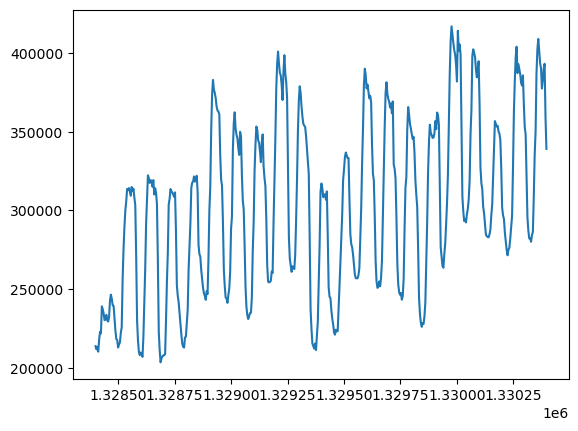

In [141]:
plt.plot(non_defined_2020["energie_sum_secteur"][:2000:4]*4)

In [62]:
historical_data["secteur"].unique()

array([11, 21, 22, 23, 31, 32, 33, 41, 44, 45, 48, 49, 51, 52, 53, 54, 55,
       56, 61, 62, 71, 72, 81, 91, 99, '99', 'Non Defini', 'Residentiel'],
      dtype=object)

In [121]:
non_defined_2020 = historical_data[(historical_data["secteur"].str.startswith("45")) & (historical_data["Intervalle15Minutes"].str.startswith("2020"))]

In [122]:
non_defined_2020

,secteur,Intervalle15Minutes,energie_sum_secteur,nb_installations
1328400,45,2020-01-01T00:00:00.000Z,53426.7965,16599
1328401,45,2020-01-01T00:15:00.000Z,53610.6240,16599
1328402,45,2020-01-01T00:30:00.000Z,53626.0707,16596
1328403,45,2020-01-01T00:45:00.000Z,53025.4197,16596
1328404,45,2020-01-01T01:00:00.000Z,52923.1227,16597
...,...,...,...,...
1363527,45,2020-12-31T22:45:00.000Z,57508.7050,16749
1363528,45,2020-12-31T23:00:00.000Z,56324.9955,16746
1363529,45,2020-12-31T23:15:00.000Z,56765.3406,16749
1363530,45,2020-12-31T23:30:00.000Z,56623.1154,16751


In [74]:
 historical_data["secteur"] =  historical_data["secteur"].astype(str)

In [160]:
def query_eletricity(db_path):                                                       
    # Connect to the SQLite database                                                 
    conn = sqlite3.connect(db_path)                                                  
    cursor = conn.cursor()                                                           
    print(db_path)                                                                   
                                                                                     
    # Query to fetch the entire dataset for "Electricity:Facility"                   
    query_full_data = """                                                            
    SELECT TimeIndex, Value                                                          
    FROM ReportData                                                                  
    WHERE ReportDataDictionaryIndex IN (                                             
        SELECT ReportDataDictionaryIndex                                             
        FROM ReportDataDictionary                                                    
        WHERE Name = 'ElectricityNet:Facility'                                       
    );                                                                               
    """                                                                              
                                                                                     
    # Execute the query and fetch the data                                           
    cursor.execute(query_full_data)                                                  
    full_data = cursor.fetchall()                                                    
    # Create a DataFrame from the data                                               
    full_df = pd.DataFrame(full_data, columns=['TimeIndex', 'Value (Joules)'])       
    cursor.close()                                                                   
    return full_df                                                                   

In [ ]:
for index,row in ach_ids_data[ach_ids_data["GEOMETRY_BASE_TYPE"] == "RetailStandalone"].iterrows():
    for elements in weather_ids_paths:
        arc_base_path = base_path +"\\"+ test_arch["GEOMETRY_BASE_TYPE"] + "\\" + "simulation_results" + "\\" + f"{elements[0]}_{row["arch_id"]}\\" 
        